In [65]:
import uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import hist
import mplhep as hep
plt.style.use(hep.style.CMS)

In [63]:
def plot_hist_1d(ax, data, bins, weight=None, linewidth=2.5, yerr=True,
                 xlabel=None, ylabel=None, label=None, histtype='step', 
                 title=None, mask=None, color=None, density=None):
    if mask is None:
        mask = np.ones_like(data, dtype=bool)
    if weight is None:
        weight = np.ones_like(data)

    hist_1d = hist.Hist(
        hist.axis.Regular(*bins),
        storage=hist.storage.Weight()
    )

    hist_1d.fill(data[mask], weight=weight[mask])
    hist_1d.plot(ax=ax, label=label, color=color, yerr=yerr,
                density=density, histtype=histtype, linewidth=linewidth)

    ax.set_xlim(bins[1], bins[2])
    ax.set_ylim(0, )
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.legend()
    return ax, hist_1d

In [3]:
tree = uproot.open('ntuple.root')['deepMuonRecoNtuplizer/tree']

In [56]:
for key in tree.keys():
    print(key)


track_pt
track_eta
track_phi
track_px
track_py
track_pz
track_vx
track_vy
track_vz
track_qoverp
track_lamda
track_dxy
track_dsz
track_qoverp_err
track_lambda_err
track_phi_err
track_dxy_err
track_dsz_err
track_charge
track_chi2
track_ndof
track_n_algo
track_is_good_track
track_is_reco_muon
track_is_trk_muon
track_is_glb_muon
track_is_pf_muon
track_is_matched_muon
track_match_quality
track_match_tp_idx
tp_pt
tp_eta
tp_phi
tp_pdg_id
tp_charge
tp_status
rpc_hit_rawid
rpc_hit_pos_x
rpc_hit_pos_y
rpc_hit_pos_z
rpc_hit_pos_x_err
rpc_hit_pos_y_err
rpc_hit_cls
rpc_hit_bx
gem_hit_rawid
gem_hit_pos_x
gem_hit_pos_y
gem_hit_pos_z
gem_hit_pos_x_err
gem_hit_pos_y_err
gem_hit_cls
gem_hit_bx
dt_seg_rawid
dt_seg_pos_x
dt_seg_pos_y
dt_seg_pos_z
dt_seg_pos_x_err
dt_seg_pos_y_err
dt_seg_dir_x
dt_seg_dir_y
dt_seg_dir_z
dt_seg_dir_x_err
dt_seg_dir_y_err
dt_seg_chi2
dt_seg_ndof
csc_seg_rawid
csc_seg_pos_x
csc_seg_pos_y
csc_seg_pos_z
csc_seg_pos_x_err
csc_seg_pos_y_err
csc_seg_dir_x
csc_seg_dir_y
csc_seg_dir_

In [45]:
arr = tree.arrays()

In [55]:
print(arr.track_match_quality)

print(ak.num(arr.track_is_matched_muon))
print(ak.sum(arr.track_is_matched_muon, axis=1))
print(np.mean(ak.sum(arr.track_is_matched_muon, axis=1)))

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 1, 1, 1, 0, 1, 0.923, 1, 0], ...]
[6539, 8014, 6567, 7021, 6254, 7376, ..., 6388, 6992, 8775, 5593, 6708, 7526]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..., 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
1.992


In [44]:
track_qoverp = tree['track_qoverp'].array()
track_is_trk_muon = tree['track_is_trk_muon'].array()
track_is_matched_muon = tree['track_is_matched_muon'].array()

dt_seg_pos_x = tree['dt_seg_pos_x'].array()
csc_seg_pos_x = tree['csc_seg_pos_x'].array()
seg_pos_x = ak.concatenate([dt_seg_pos_x, csc_seg_pos_x], axis=1)

rpc_hit_pos_x = tree['rpc_hit_pos_x'].array()
gem_hit_pos_x = tree['gem_hit_pos_x'].array()
hit_pos_x = ak.concatenate([rpc_hit_pos_x, gem_hit_pos_x], axis=1)

n_track = ak.num(track_qoverp)
n_trk_muon = ak.sum(track_is_trk_muon, axis=1)
n_matched_muon = ak.sum(track_is_matched_muon, axis=1)
n_dt_seg = ak.num(dt_seg_pos_x)
n_csc_seg = ak.num(csc_seg_pos_x)
n_rpc_hit = ak.num(rpc_hit_pos_x)
n_gem_hit = ak.num(gem_hit_pos_x)
n_seg = ak.num(seg_pos_x)
n_hit = ak.num(hit_pos_x)

print(n_track)
print(n_trk_muon)
print(n_matched_muon)
print(n_seg)
print(n_hit)


[6539, 8014, 6567, 7021, 6254, 7376, ..., 6388, 6992, 8775, 5593, 6708, 7526]
[51, 26, 52, 63, 47, 57, 53, 71, 41, ..., 51, 45, 40, 40, 48, 54, 44, 37, 47]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..., 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[69, 29, 72, 64, 69, 71, 78, 96, 56, ..., 54, 54, 44, 51, 62, 76, 53, 60, 88]
[4382, 4148, 3976, 4496, 4084, 4401, ..., 3884, 3700, 4377, 4026, 4030, 3890]


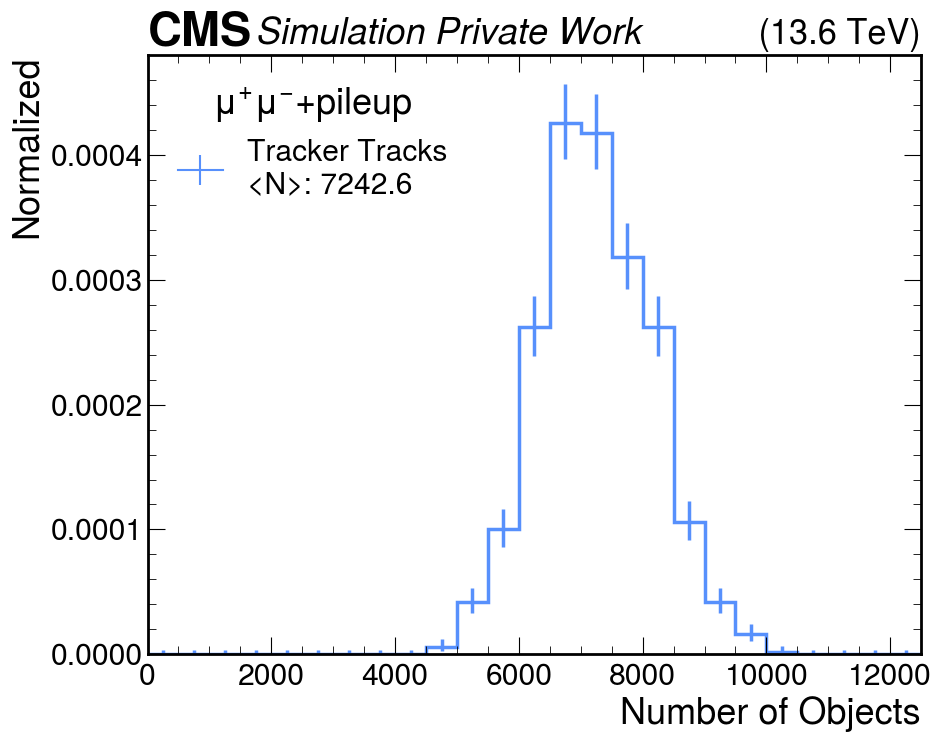

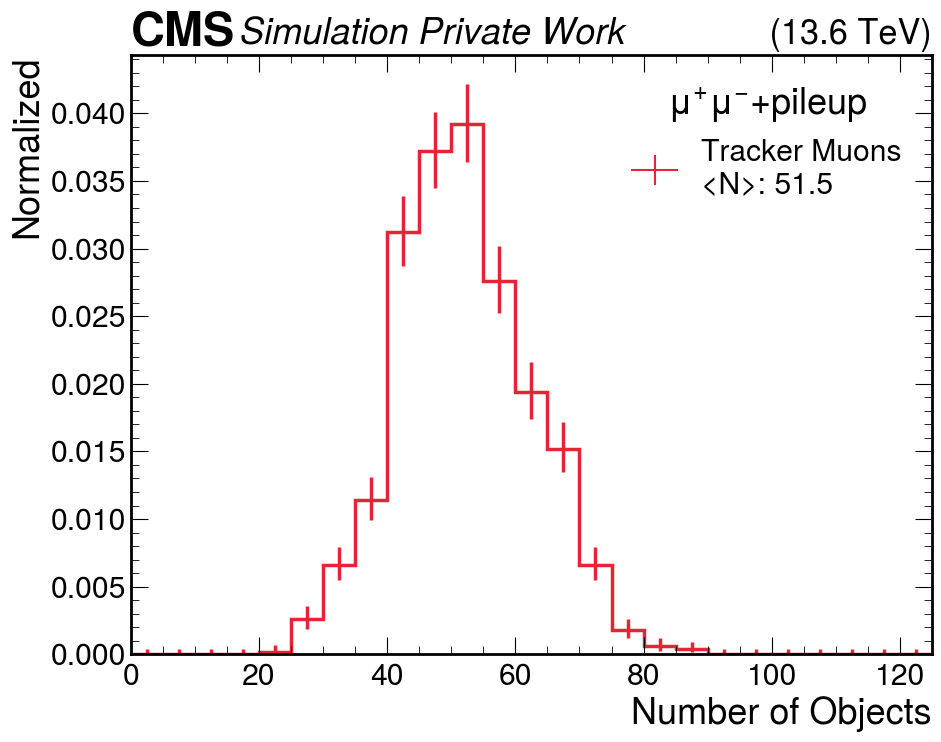

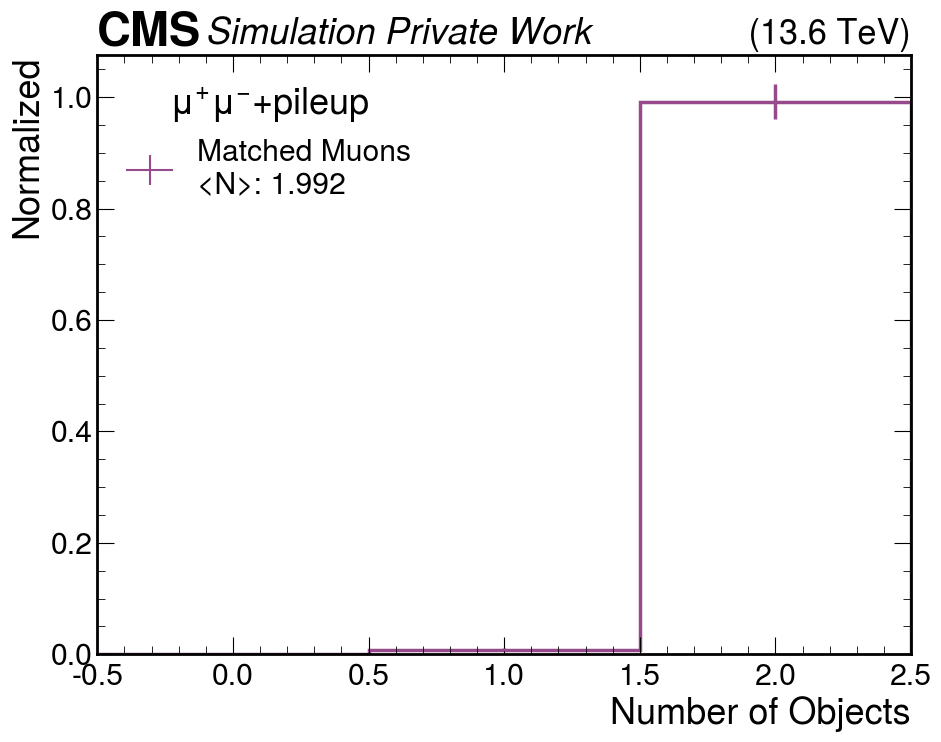

In [86]:
fig, ax = plt.subplots(figsize=(10, 8))
ax, h_n_track = plot_hist_1d(ax=ax, data=n_track, bins=(25, 0, 12500), 
                             label='Tracker Tracks\n' + fr'<N>: {np.mean(n_track):.1f}', 
                             color='C0', density=True)
ax.set_xlabel('Number of Objects')
ax.set_ylabel('Normalized')
hep.cms.label('Private Work', ax=ax, data=False, com=13.6)
plt.legend(title=r'$\mu^{+}\mu^{-}$+pileup')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
ax, h_n_trk_muon = plot_hist_1d(ax=ax, data=n_trk_muon, bins=(25, 0, 125),
                                label='Tracker Muons\n' + fr'<N>: {np.mean(n_trk_muon):.1f}', 
                                color='C2', density=True)
ax.set_xlabel('Number of Objects')
ax.set_ylabel('Normalized')
hep.cms.label('Private Work', ax=ax, data=False, com=13.6)
plt.legend(title=r'$\mu^{+}\mu^{-}$+pileup')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
ax, h_n_matched_muon = plot_hist_1d(ax=ax, data=n_matched_muon, bins=(3, -0.5, 2.5),
                                    label='Matched Muons\n' + fr'<N>: {np.mean(n_matched_muon):.3f}', 
                                    color='C3', density=True)
ax.set_xlabel('Number of Objects')
ax.set_ylabel('Normalized')
hep.cms.label('Private Work', ax=ax, data=False, com=13.6)
plt.legend(title=r'$\mu^{+}\mu^{-}$+pileup')
plt.tight_layout()
plt.show()

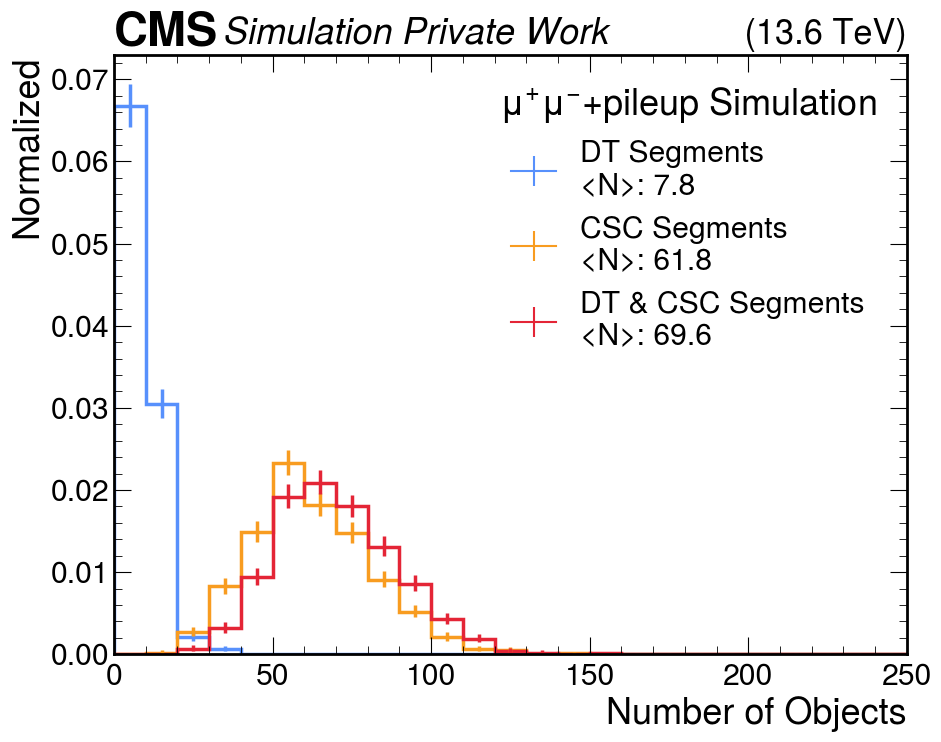

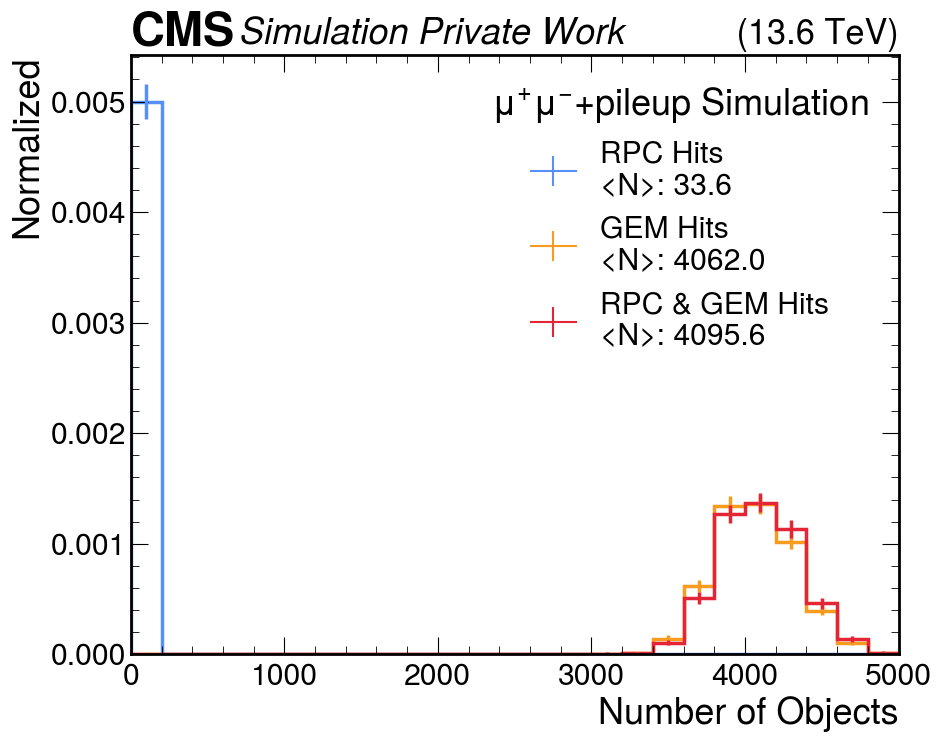

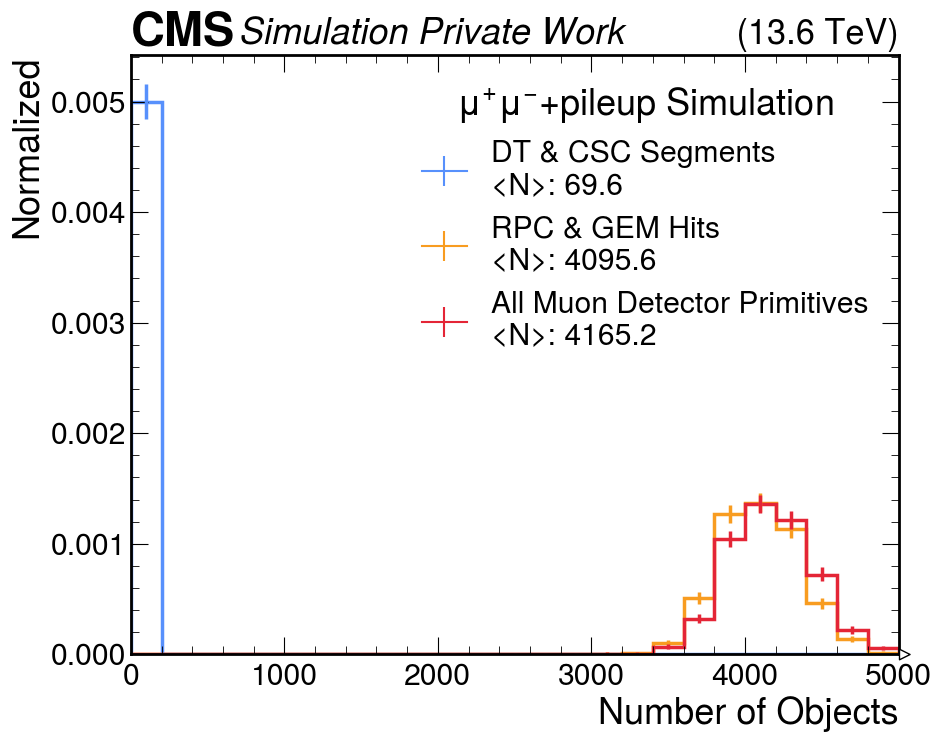

In [97]:
fig, ax = plt.subplots(figsize=(10, 8))
ax, h_n_dt_seg = plot_hist_1d(ax=ax, data=n_dt_seg, bins=(25, 0, 250), label='DT Segments\n' + fr'<N>: {np.mean(n_dt_seg):.1f}', color='C0', density=True)
ax, h_n_csc_seg = plot_hist_1d(ax=ax, data=n_csc_seg, bins=(25, 0, 250), label='CSC Segments\n' + fr'<N>: {np.mean(n_csc_seg):.1f}', color='C1', density=True)
ax, h_n_dt_csc_seg = plot_hist_1d(ax=ax, data=n_dt_seg+n_csc_seg, bins=(25, 0, 250), label='DT & CSC Segments\n' + fr'<N>: {np.mean(n_seg):.1f}', color='C2', density=True)
ax.set_xlabel(r'Number of Objects')
ax.set_ylabel('Normalized')
hep.cms.label("Private Work", ax=ax, data=False, com=13.6)
plt.legend(title=r'$\mu^{+}\mu^{-}$+pileup')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
ax, h_n_rpc_hit = plot_hist_1d(ax=ax, data=n_rpc_hit, bins=(25, 0, 5000), label='RPC Hits\n' + fr'<N>: {np.mean(n_rpc_hit):.1f}', color='C0', density=True)
ax, h_n_gem_hit = plot_hist_1d(ax=ax, data=n_gem_hit, bins=(25, 0, 5000), label='GEM Hits\n' + fr'<N>: {np.mean(n_gem_hit):.1f}', color='C1', density=True)
ax, h_n_rpc_gem_hit = plot_hist_1d(ax=ax, data=n_rpc_hit+n_gem_hit, bins=(25, 0, 5000), label='RPC & GEM Hits\n' + fr'<N>: {np.mean(n_hit):.1f}', color='C2', density=True)
ax.set_xlabel(r'Number of Objects')
ax.set_ylabel('Normalized')
hep.cms.label("Private Work", ax=ax, data=False, com=13.6)
plt.legend(title=r'$\mu^{+}\mu^{-}$+pileup')
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(10, 8))
ax, h_n_seg = plot_hist_1d(ax=ax, data=n_seg, bins=(25, 0, 5000), label='DT & CSC Segments\n' + fr'<N>: {np.mean(n_seg):.1f}', color='C0', density=True)
ax, h_n_hit = plot_hist_1d(ax=ax, data=n_hit, bins=(25, 0, 5000), label='RPC & GEM Hits\n' + fr'<N>: {np.mean(n_hit):.1f}', color='C1', density=True)
ax, h_n_seg_plus_hit = plot_hist_1d(ax=ax, data=n_seg+n_hit, bins=(25, 0, 5000), label='All Muon Detector Primitives\n' + fr'<N>: {np.mean(n_seg+n_hit):.1f}', color='C2', density=True)
ax.set_xlabel(r'Number of Objects')
ax.set_ylabel('Normalized')
hep.cms.label("Private Work", ax=ax, data=False, com=13.6)
plt.legend(title=r'$\mu^{+}\mu^{-}$+pileup')
plt.tight_layout()
plt.show()